In [8]:
# Load libraries
import numpy as np
import pandas as pd

# Intro to Scikit-Learn

This notebook is a brief introduction to scikit-learn, one of the most popular libraries, and probably the most complete, that Python has to perform Machine Learning computations. For more information visit http://scikit-learn.org.

## About Scikit-Learn

Scikit-Learn is a Python package designed to give access to popular machine learning algorithms, through a clean and well thought out API. It was built by hundreds of collaborators around the world and is used throughout industry and academia.

Scikit-Learn is based on Python's NumPy (Numerical Python) and SciPy (Scientific Python) libraries, which enable efficient numerical and scientific computing through Python.



## Datasets in Scikit-Learn

Most of the machine learning algorithms implemented in scikit-learn expect the data to be stored in a two-dimensional array. The arrays will normally be numpy arrays. The size of the array is expected to be [n_samples, n_features], where:

- **n_samples:** the number of samples. Each sample is an instance to process. A sample can be a document, an image, a sound, a video, an astronomical object, a row in the database, or anything you can describe with a fixed set of quantitative or categorical traits.
    
- **n_features:** the number of different characteristics or traits that can be used to describe each instance. Features generally have a real value, but can be Boolean or discrete for some models.

### Example: Iris dataset

Scikit-Learn has several datasets pre-loaded ready to be used: https://scikit-learn.org/stable/datasets.html

One of the best known is the iris dataset. Let's import it.

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
dat = pd.DataFrame(iris.data)
dat.columns = iris.feature_names
dat["Species"] = iris.target
dat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
?train_test_split

In [12]:
X_train, X_test = train_test_split(dat, test_size = 0.5)

In [13]:
X_test.shape

(75, 5)

## Models

Scikit-Learn has an extensive battery of Machine Learning models available, this being one of the great advantages of using this library.

Another reason for its popularity is that it provides a general-purpose framework for all types of models. It basically consists of 6 steps:

1. Import model that you want to use.

      - See list of supervised models at: https://scikit-learn.org/stable/supervised_learning.html
      - See list of unsupervised models at: https://scikit-learn.org/stable/unsupervised_learning.html
      

2. It matters metric to use. See list of available metrics at https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.

3. Define model.

4. Call the fit method to train the model.

5. Call the predict method to generate the predictions.

6. Calculate metric using the predictions obtained in the previous step.

Let's see all these steps with a simple example

### Example: KNN

When using a k-nearest neighbors, KNN classification model, the prediction assigned to a point is the most common class among the k closest (or similar, according to some kind of similarity distance). If k = 1, then each sample is simply assigned the class of the closest instance.

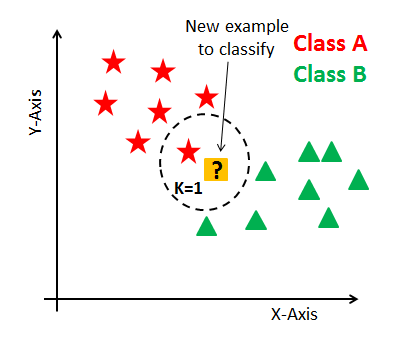

Applied to regression, the operation is the same only that instead of the most common class, each instance will be assigned the mean of the target for the k closest neighbors.

Let's now train a KNN classification model for the iris dataset following the 6 steps above (**note**: we will only divide into train / test set as this is a purely illustrative example):

1) Import model.

In [14]:
from sklearn.neighbors import KNeighborsClassifier as model_constructor

2) Import metric.

In [15]:
from sklearn.metrics import accuracy_score as metric

3) Define model.

In [16]:
?model_constructor

In [17]:
model = model_constructor()
model

KNeighborsClassifier()

4) Call fit method to train the model.

In [18]:
model.fit(X_train.drop('Species', axis = 1), X_train['Species'])

KNeighborsClassifier()

5) Call predict method to generate predictions.

In [19]:
pred_test = model.predict(X_test.drop('Species', axis = 1))
pred_test[0:5]

array([2, 2, 0, 1, 0])

6) Compute metric using predictions from the previous step.

In [20]:
metric(X_test['Species'], pred_test)

0.9733333333333334